[View in Colaboratory](https://colab.research.google.com/github/Jaydaar/Python/blob/master/Regression_Example.ipynb)

In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.10.0


In [4]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set

order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

57344/57026 [==============================] - 0s 0us/step


In [5]:
print("Training sets: {} ".format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

Training sets: (404, 13) 
Testing set: (102, 13)


In [6]:
print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [7]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [8]:
print(train_labels[:10])

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [9]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [10]:
def build_model():
  model = keras.Sequential([
      keras.layers.Dense(64, activation=tf.nn.relu,
                        input_shape=(train_data.shape[1],)),
      keras.layers.Dense(64, activation=tf.nn.relu),
      keras.layers.Dense(1)
  ])
  
  optimizer = tf.train.RMSPropOptimizer(0.001)
  
  model.compile(loss='mse',
               optimizer=optimizer,
               metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats

history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2,
                   verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

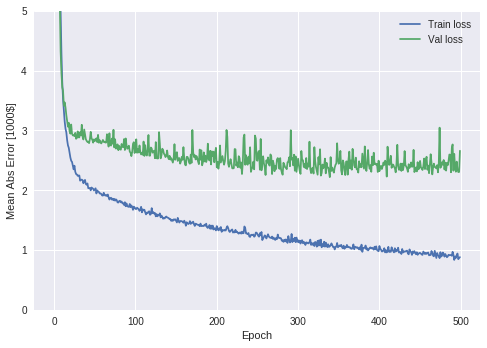

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
          label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
          label='Val loss')
  plt.legend()
  plt.ylim([0, 5])
  
plot_history(history)


....................................................................................................
....................................................................................

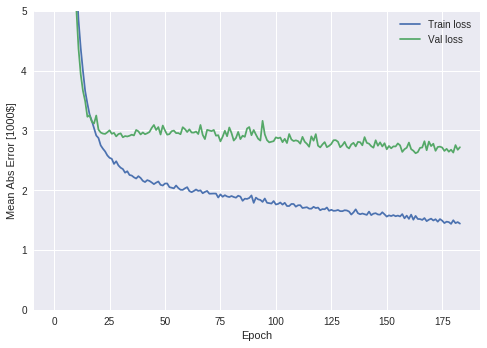

In [14]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0,
                   callbacks=[early_stop, PrintDot()])

plot_history(history)

In [15]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $3092.99


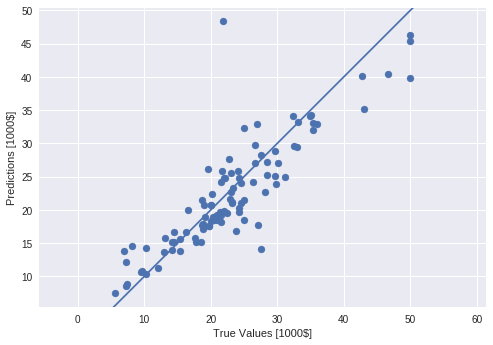

In [16]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel("True Values [1000$]")
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

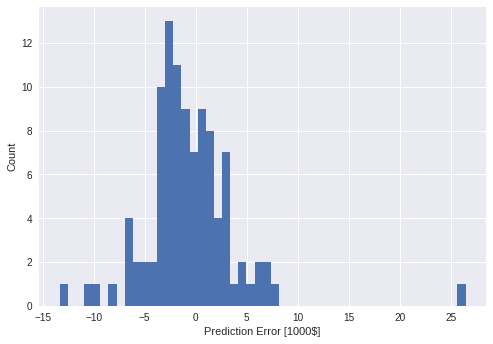

In [17]:
error = test_predictions -test_labels
plt.hist(error, bins=50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")